In [1]:
'''
Jan 14, 2017
CPM
NBA_shot_logs

Add player position information.

https://www.kaggle.com/dansbecker/nba-shot-logs
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from model.miss_match import attack_mm_PG,attack_mm_C,attack_mm_SG,attack_mm_PF
%matplotlib inline

In [2]:
df = pd.read_csv('data\shot_logs_pos.csv')
df_features = df[['GAME_ID','MATCHUP','W','FGM','PTS_TYPE','CLOSE_DEF_DIST',
				'player_name','player_pos', 'player_pos_ID','CLOSEST_DEFENDER' ,'CD_pos',
				'CD_pos_ID']]
	   
df_features.reset_index(drop=True,inplace=True)

In [3]:
df_PG = df_features.copy()
df_C = df_features.copy()
df_SG = df_features.copy()
df_PF = df_features.copy()

player_p = ['PG','C','SG','PF']
methods = [attack_mm_PG,attack_mm_C,attack_mm_SG,attack_mm_PF]
dataframes = [df_PF,df_C,df_SG,df_PF]

In [4]:
acc = []
for position,dataframe,method in zip(player_p,dataframes, methods):
    dftemp = dataframe[dataframe['player_pos'] == position]
    dftemp['miss match'] = dftemp['CD_pos_ID'].apply(method)
    acc.append(dftemp)

C:\Users\Weizen\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
player_PG = acc[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_C = acc[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_SG = acc[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_PF = acc[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

In [6]:
pd.concat([player_PG,player_SG,player_PF,player_C],axis=1)

player_pos_ID             1.0       2.0       4.0       5.0
miss match PTS_TYPE                                        
0          2         0.467139  0.466229  0.492507  0.506305
           3         0.341147  0.365078  0.342801  0.320707
1          2         0.470356  0.469087  0.568822  0.590555
           3         0.360743  0.376289  0.347025  0.346667

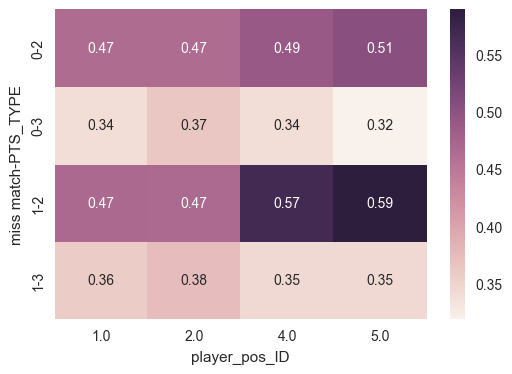

In [7]:
sns.heatmap(pd.concat([player_PG,player_SG,player_PF,player_C],axis=1),annot=True)

In [8]:
player_PG = acc[0].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')
player_C = acc[1].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')
player_SG = acc[2].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')
player_PF = acc[3].pivot_table(values='FGM',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'],aggfunc='count')

In [9]:
pd.concat([player_PG,player_SG,player_PF,player_C],axis=1)

player_pos_ID          1.0    2.0    4.0    5.0
miss match PTS_TYPE                            
0          2         16235  12807  18684  16812
           3          8319   8642   4049    396
1          2          2530   1763   2521   2054
           3           377    388    706     75

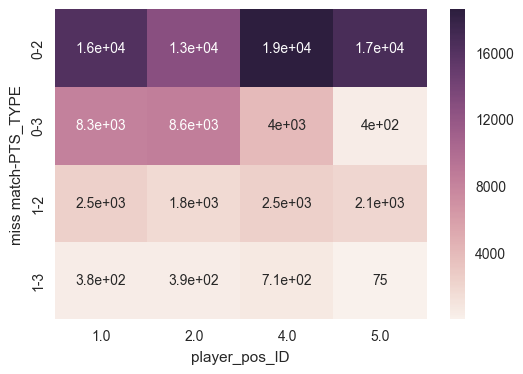

In [10]:
sns.heatmap(pd.concat([player_PG,player_SG,player_PF,player_C],axis=1),annot=True)

In [11]:
player_PG = acc[0].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_C = acc[1].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_SG = acc[2].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])
player_PF = acc[3].pivot_table(values='CLOSE_DEF_DIST',index=['miss match', 'PTS_TYPE'],columns=['player_pos_ID'])

In [12]:
pd.concat([player_PG,player_SG,player_PF,player_C],axis=1)

player_pos_ID             1.0       2.0       4.0       5.0
miss match PTS_TYPE                                        
0          2         3.456421  3.383603  3.508836  3.411403
           3         5.636326  5.613434  6.820227  7.045707
1          2         3.265375  3.208338  3.669853  3.655696
           3         7.419363  7.742010  7.089943  7.568000

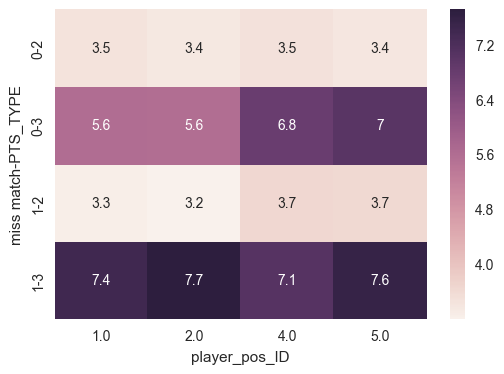

In [13]:
sns.heatmap(pd.concat([player_PG,player_SG,player_PF,player_C],axis=1),annot=True)